In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
from math import isnan

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

In [18]:
implicit_hx1k_df = pd.read_csv("../testbench_results/implicit_hx1k_limited_size.csv")
explicit_hx1k_df = pd.read_csv("../testbench_results/explicit_hx1k_limited_size.csv")
implicit_up5k_df = pd.read_csv("../testbench_results/implicit_up5k.csv")
explicit_up5k_df = pd.read_csv("../testbench_results/explicit_up5k.csv")
implicit_up5k_pico2_df = pd.read_csv("../testbench_results/implicit_up5k_pico2.csv")
explicit_up5k_pico2_df = pd.read_csv("../testbench_results/explicit_up5k_pico2.csv")
spram_implicit_up5k_df = pd.read_csv("../testbench_results/spram_implicit_up5k.csv")
spram_explicit_up5k_df = pd.read_csv("../testbench_results/spram_explicit_up5k.csv")
spram_implicit_up5k_pico2_df = pd.read_csv("../testbench_results/spram_implicit_up5k_pico2.csv")
spram_explicit_up5k_pico2_df = pd.read_csv("../testbench_results/spram_explicit_up5k_pico2.csv")

modes = ('IM HX1K', 'EX HX1K', \
         'IM Pico', 'EX Pico', 'IM  Pico2', 'EX  Pico2', \
         'SPRAM IM Pico', 'SPRAM EX Pico', 'SPRAM IM  Pico2', 'SPRAM EX  Pico2')
means = {
    'Read': (
        implicit_hx1k_df[implicit_hx1k_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        explicit_hx1k_df[explicit_hx1k_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        implicit_up5k_df[implicit_up5k_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        explicit_up5k_df[explicit_up5k_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        implicit_up5k_pico2_df[implicit_up5k_pico2_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        explicit_up5k_pico2_df[explicit_up5k_pico2_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        spram_implicit_up5k_df[spram_implicit_up5k_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        spram_explicit_up5k_df[spram_explicit_up5k_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        spram_implicit_up5k_pico2_df[spram_implicit_up5k_pico2_df['R/W'] == 'Read']['Time (microseconds)'].mean(),
        spram_explicit_up5k_pico2_df[spram_explicit_up5k_pico2_df['R/W'] == 'Read']['Time (microseconds)'].mean()
    ),
    'Write': (
        implicit_hx1k_df[implicit_hx1k_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        explicit_hx1k_df[explicit_hx1k_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        implicit_up5k_df[implicit_up5k_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        explicit_up5k_df[explicit_up5k_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        implicit_up5k_pico2_df[implicit_up5k_pico2_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        explicit_up5k_pico2_df[explicit_up5k_pico2_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        spram_implicit_up5k_df[spram_implicit_up5k_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        spram_explicit_up5k_df[spram_explicit_up5k_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        spram_implicit_up5k_pico2_df[spram_implicit_up5k_pico2_df['R/W'] == 'Write']['Time (microseconds)'].mean(),
        spram_explicit_up5k_pico2_df[spram_explicit_up5k_pico2_df['R/W'] == 'Write']['Time (microseconds)'].mean()
    ),
}

print(means)

{'Read': (14333.031492842536, 14452.466257668711, 2870.9163974151857, 2889.243537964459, 2847.246365105008, 2868.8049273021, 2993.5621445978877, 2989.6762794476035, 2977.3509341998374, 2984.924451665313), 'Write': (3498.157338551859, 3483.484540117417, 1263.10618066561, 1307.2547543581616, 1238.6458003169573, 1292.3272583201267, 1264.7876280535854, 1259.4294720252167, 1280.2379826635147, 1306.5248226950355)}


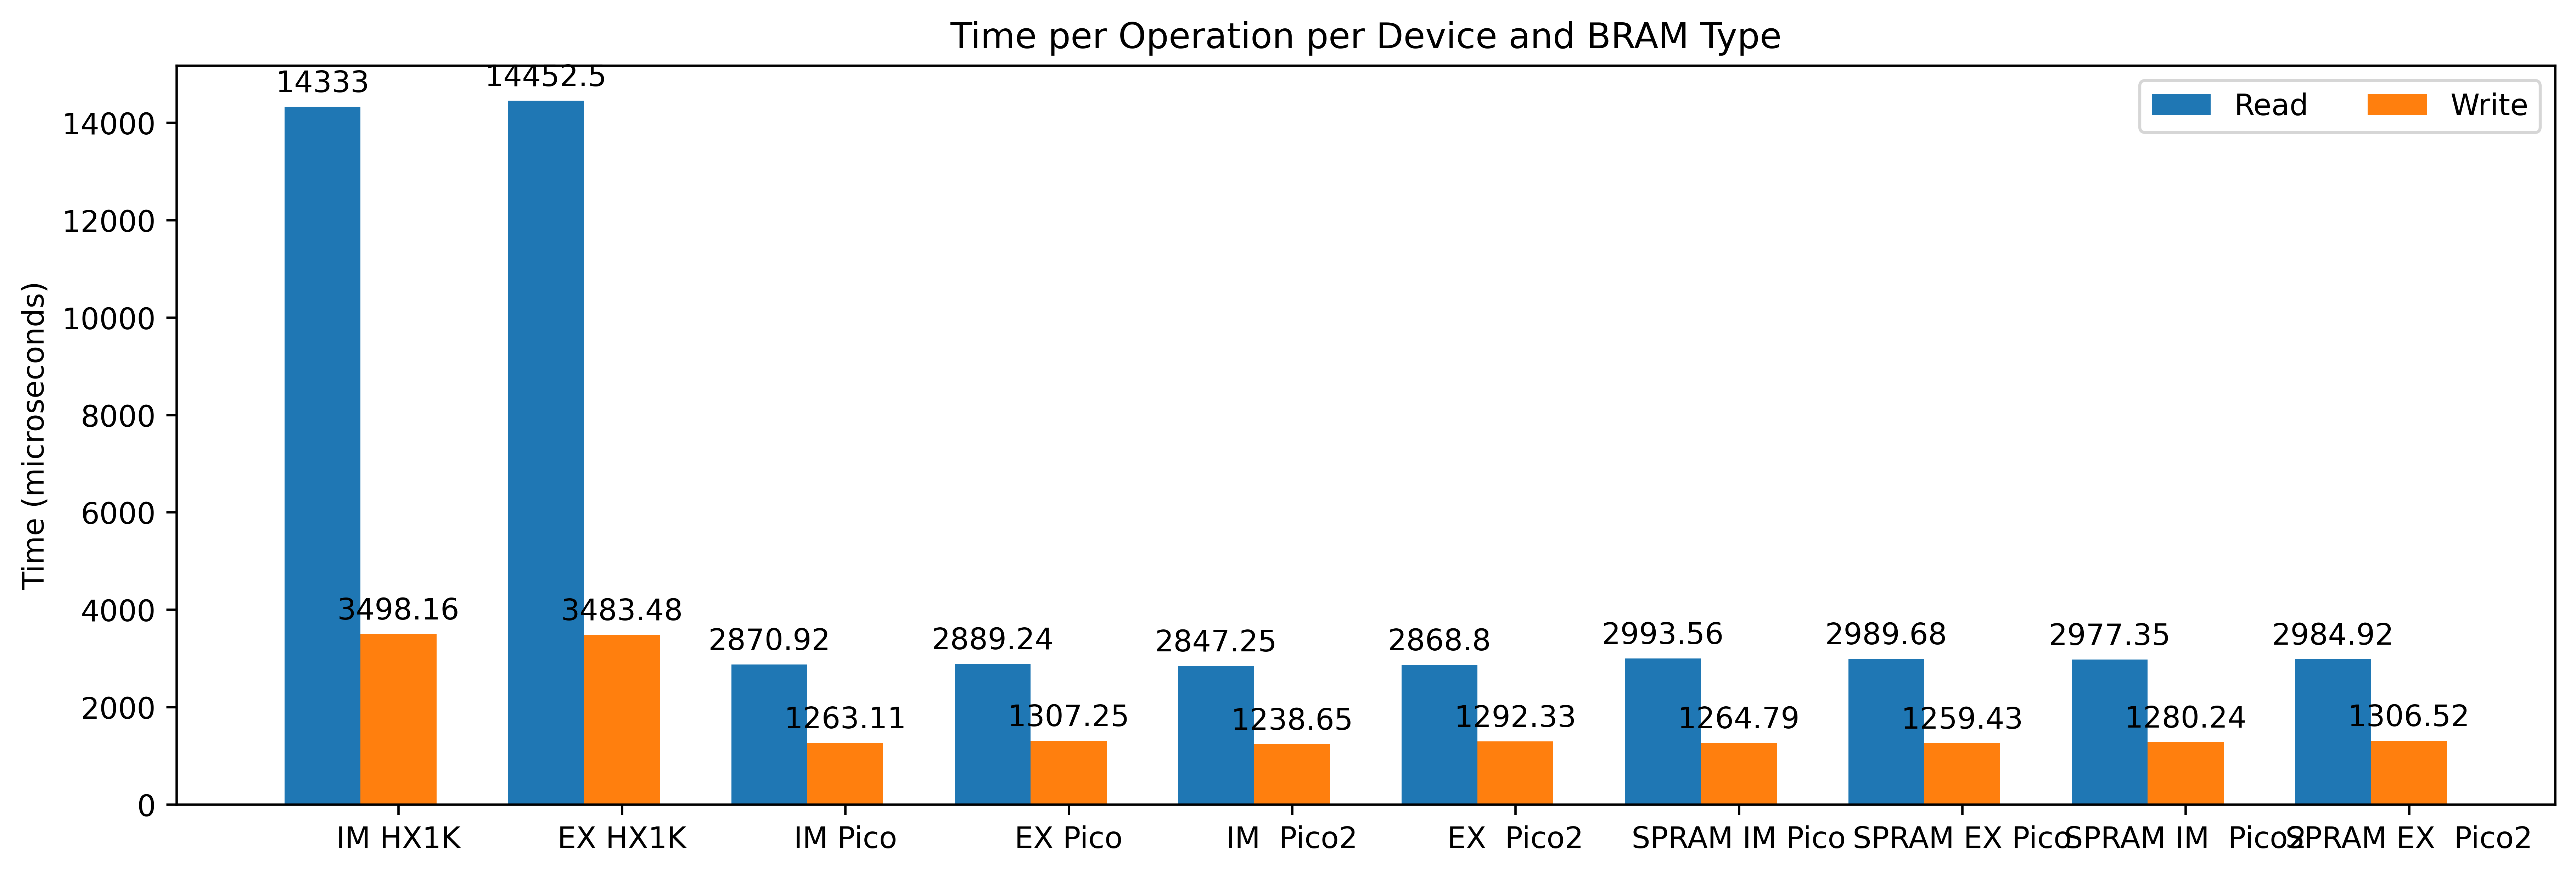

In [ ]:
x = np.arange(len(modes))  # the label locations
width = 0.34  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', dpi=600, figsize=(14,4))

for attribute, measurement in means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (microseconds)')
ax.set_title('Time per Operation per Device and BRAM Type')
ax.set_xticks(x + width, modes)
ax.legend(loc='upper right', ncols=2)

plt.show()